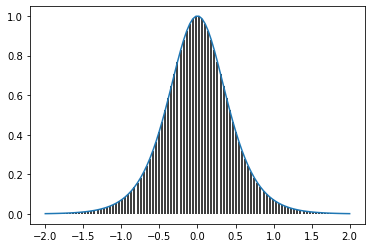

In [87]:
# Exercise 5.15
# Taking the derivative analytically and numerically
import math
import numpy as np
from matplotlib import pylab as py
import matplotlib.pyplot as plt
def f(x):
    return 1 + (.5 * math.tanh(2*x))
def derivative(x, h):
    x1 = x + h
    x2 = x - h
    return (f(x1) - f(x2)) / (2 * h)
Y = []
X = []
Y1 = []
for i in np.linspace(-2, 2, 100):
    x = i
    d = derivative(x, 10**-5)
    Y.append(d)
    X.append(x)
    numderiv = 1 - (math.tanh(2*x))**2
    Y1.append(numderiv)
plt.vlines(x=X, ymin=0, ymax=Y)
plt.plot(X,Y1)
py.show()
    

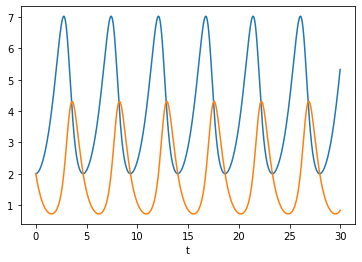

In [88]:
# Exercise 8.2
# 4th order Runge Kutta for ODE's describing foxes and rabbits
from numpy import array,arange
from pylab import plot,xlabel,show
def f(r,t):
    alpha = 1
    beta = .5
    gamma = .5
    delta = 2
    x = r[0]
    y = r[1]
    fx = (alpha * x) - (beta * x * y)
    fy = (gamma * x * y) - (delta * y)
    return array([fx,fy],float)
a = 0
b = 30
N = 1000
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
ypoints = []

r = array([2.0, 2.0],float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
plot(tpoints,xpoints)
plot(tpoints,ypoints)
xlabel("t")
show()
# Both the foxes and rabbits populations fluctuate at around the same pace, 
# but are shifted slightly. When the fox population is lower, the rabbit population is higher.
# When the fox population is higher, the rabbit population is lower. This is a good representation
# of what happens in predator-prey relationships.

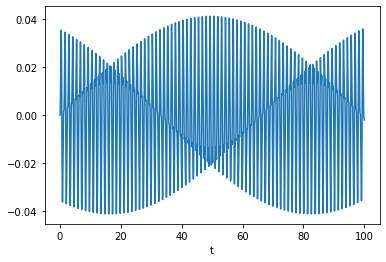

In [11]:
# Exercise 8.5a
import numpy as np
from pylab import plot,xlabel,show,arange,array
# Oscillations of a driven pendulum
def f(r,t):
    g = 9.81
    l = .1
    ohm = 5
    C = 2
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = (-(g/l)*(np.sin(theta)))+(C*(np.cos(theta))*(np.sin(ohm*t)))
    return array([ftheta,fomega],float)
a = 0
b = 100
N = 100000
h = (b-a)/N

tpoints = arange(a,b,h)
thetapoints = []
omegapoints = []

r = array([0, 0],float)
for t in tpoints:
    thetapoints.append(r[0])
    omegapoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
plot(tpoints,thetapoints)
xlabel("t")
show()

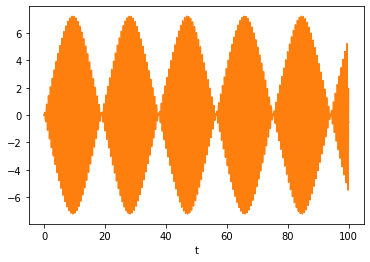

In [15]:
# Exercise 8.5b
import numpy as np
from pylab import plot,xlabel,show
# Showing the pendulum when it resonates with the driving force 
# and swings widely from side to side.
def f(r,t):
    g = 9.81
    l = .1
    ohm = 10
    C = 2
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = (-(g/l)*np.sin(theta))+(C*np.cos(theta)*np.sin(ohm*t))
    return array([ftheta,fomega],float)
a = 0
b = 100
N = 100000
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
ypoints = []

r = array([0, 0],float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
plot(tpoints,xpoints)
plot(tpoints,ypoints)
xlabel("t")
show()

242.3 meters is the approximate distance traveled.


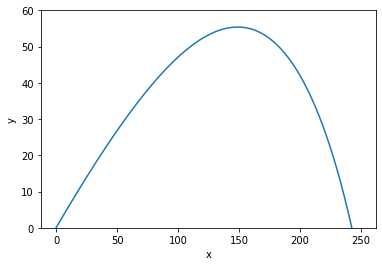

In [95]:
# Exercise 8.7a
# To get to where we want to be with the two ODE's, we start off with F = ma
# We plug in the drag force to the right side and plug in the deriviative with 
# respect to t in the right side of the equation. This separates the equation into 2,
# with one equation taking the second order derivative of x with respect to t and the other
# taking the second order derivative of y with respect to t. We need to break apart the velocity on 
# the right side of both equations, therefore we multiply the x velocity 
# to the magnitude of the velocity sqrt(vx^2+vy^2) as well as doing the same with the y velocity.
# One more step, we need to subtract the right side of the 2nd order y derivative from -g, 
# because gravity will still have an effect.
# Exercise 8.7b
import numpy as np
# Showing the trajectory of a cannon ball
from pylab import plot,xlabel,show,ylabel,ylim
def f(r,t):
    m = 1
    g = 9.81
    R = .08
    rho = 1.22
    C = .47
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    fx = vx
    fy = vy
    fvx = -((np.pi*R**2*rho*C)/(2*m))*(vx*np.sqrt(vx**2+vy**2))
    fvy = -g-((np.pi*R**2*rho*C)/(2*m))*(vy*np.sqrt(vx**2+vy**2))
    return np.array([fx,fy,fvx,fvy],float)
a = 0
b = 7
N = 1000
h = (b-a)/N

tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []
vxpoints = []
vypoints = []
r = np.array([0,0,100*np.cos(np.pi/6),100*np.sin(np.pi/6)],float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    vxpoints.append(r[2])
    vypoints.append(r[3])
    if r[1] == 0.0589328283116306:
        print('%.1f' % r[0], 'meters is the approximate distance traveled.')
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
plot(xpoints,ypoints)
ylim(0,60)
xlabel("x")
ylabel("y")
show()

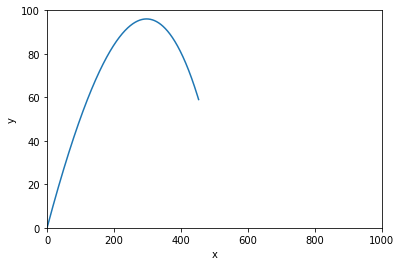

In [91]:
import numpy as np
from pylab import plot,xlabel,show,ylabel,ylim,xlim
# Trajectory of a higher mass cannon ball
def f(r,t):
    m = 5
    g = 9.81
    R = .08
    rho = 1.22
    C = .47
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    fx = vx
    fy = vy
    fvx = -((np.pi*R**2*rho*C)/(2*m))*(vx*np.sqrt(vx**2+vy**2))
    fvy = -g-((np.pi*R**2*rho*C)/(2*m))*(vy*np.sqrt(vx**2+vy**2))
    return np.array([fx,fy,fvx,fvy],float)
a = 0
b = 7
N = 1000
h = (b-a)/N

tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []
vxpoints = []
vypoints = []
r = np.array([0,0,100*np.cos(np.pi/6),100*np.sin(np.pi/6)],float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    vxpoints.append(r[2])
    vypoints.append(r[3])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
plot(xpoints,ypoints)
ylim(0,100)
xlim(0,1000)
xlabel("x")
ylabel("y")
show()

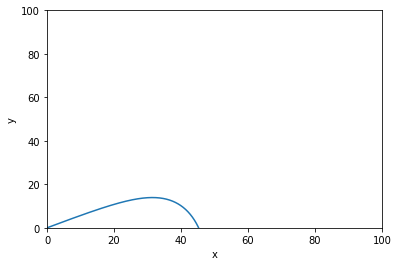

In [75]:
import numpy as np
from pylab import plot,xlabel,show,ylabel,ylim,xlim
# Trajectory of a lower mass cannon ball
def f(r,t):
    m = .1
    g = 9.81
    R = .08
    rho = 1.22
    C = .47
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    fx = vx
    fy = vy
    fvx = -((np.pi*R**2*rho*C)/(2*m))*(vx*np.sqrt(vx**2+vy**2))
    fvy = -g-((np.pi*R**2*rho*C)/(2*m))*(vy*np.sqrt(vx**2+vy**2))
    return np.array([fx,fy,fvx,fvy],float)
a = 0
b = 7
N = 1000
h = (b-a)/N

tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []
vxpoints = []
vypoints = []
r = np.array([0,0,100*np.cos(np.pi/6),100*np.sin(np.pi/6)],float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    vxpoints.append(r[2])
    vypoints.append(r[3])
    if r[1] == 0.0589328283116306:
        print(r[0])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
plot(xpoints,ypoints)
ylim(0,100)
xlim(0,100)
xlabel("x")
ylabel("y")
show()

In [ ]:
# We can see from these past 2 graphs that the lighter 
# the mass the shorter it travels and the larger the mass the further it travels